In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

C:\Users\vikio\AppData\Local\Temp\ipykernel_21720\2836724294.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
height = 64
width = 128
size = height*width
path = "..\..\datasets\\UNSW_NB15"
csv_file = path + "\\unswnb15_img_serialized_5.csv"

In [4]:
df = pd.read_csv(path+"\\UNSW_converted_data.csv")

In [5]:
df = df.drop_duplicates()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59168 entries, 0 to 79879
Columns: 1505 entries, payload_byte_1 to label
dtypes: float64(1), int64(1502), object(2)
memory usage: 679.8+ MB


In [7]:
df.columns

Index(['payload_byte_1', 'payload_byte_2', 'payload_byte_3', 'payload_byte_4',
       'payload_byte_5', 'payload_byte_6', 'payload_byte_7', 'payload_byte_8',
       'payload_byte_9', 'payload_byte_10',
       ...
       'payload_byte_1496', 'payload_byte_1497', 'payload_byte_1498',
       'payload_byte_1499', 'payload_byte_1500', 'ttl', 'total_len',
       'protocol', 't_delta', 'label'],
      dtype='object', length=1505)

In [8]:
df.protocol.unique()

array(['others', 'pipe', 'ipip', 'rdp', 'micp', 'crtp', 'snp', 'vmtp',
       'tcp', 'etherip', 'leaf-2', 'gre', 'ax.25', 'nvp', 'sctp', 'sep',
       'unas', 'iplt', 'gmtp', 'secure-vmtp', 'sun-nd', 'ib', 'swipe',
       'sps', 'hmp', 'rsvp', 'egp', 'ospf', 'mobile', 'ipv6', 'fire',
       'pim', 'ggp', 'sccopmce', 'dgp', 'emcon', 'crudp', 'fc', 'udp',
       'arp', 'icmp'], dtype=object)

In [9]:
len(df.protocol.unique())

41

In [10]:
indices = list(df.protocol.unique())

In [11]:
indices.index("tcp")

8

In [12]:
# move tcp to end of list
indices.remove("tcp")
indices.append("tcp")
indices.index("tcp")

40

In [13]:
indices.index("udp")

37

In [14]:
# move udp to start of list
indices.remove("udp")
indices = ["udp"] + indices
indices.index("udp")

0

In [15]:
df.protocol = df.protocol.apply(lambda x: indices.index(x))

In [16]:
df.protocol.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 40,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37,  0, 38, 39], dtype=int64)

In [17]:
df.label.unique()

array(['analysis', 'backdoor', 'dos', 'exploits', 'fuzzers', 'generic',
       'normal', 'reconnaissance', 'shellcode', 'worms'], dtype=object)

In [18]:
len(df.label.unique())

10

In [19]:
df = df.to_numpy()
df.shape, df[0, -1]

((59168, 1505), 'analysis')

In [20]:
# normalize payload, ttl, total_len
for col_index in range(df.shape[1]-1):
    column = df[:, col_index]
    column_normalized = (column - np.min(column)) / (np.max(column) - np.min(column) + 0.1)
    df[:, col_index] = column_normalized

In [21]:
np.random.shuffle(df)
df.shape, df[0, -1]

((59168, 1505), 'fuzzers')

In [22]:
df.dtype

dtype('O')

(5, 1504) normal
(7520,)
(8192,)
(64, 128)


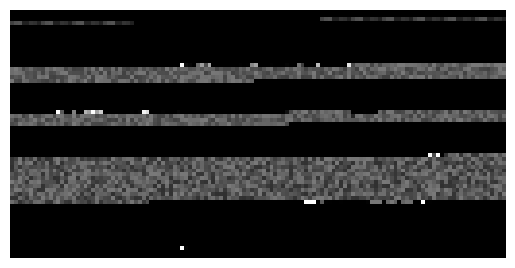

DONE


In [55]:
def convert_dataset_to_grayscale_image(arr):
    for idx in range(len(arr) - 5):
        batch = arr[idx: idx + 5, :-1]
        label = arr[idx + 5, -1]
        print(batch.shape, label)
        data = np.concatenate(batch)
        print(data.shape)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        print(data.shape)
        data = data.reshape(height, width).astype('float64')
        print(data.shape)
        
        plt.imshow(data, cmap='gray')
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_grayscale_image(df)

(5, 1504) normal
(7520,)
(64, 128)
(64, 128)
(64, 128)
(64, 128, 3)


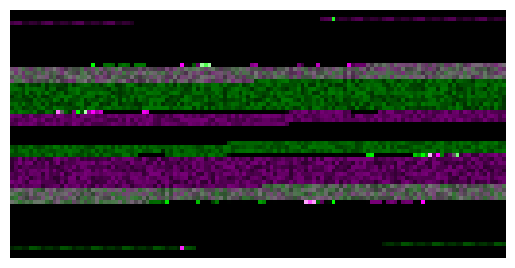

DONE


In [56]:
def convert_dataset_to_rgb_image(arr):
    for idx in range(len(arr) - 5):
        batch = arr[idx: idx + 5, :-1]
        label = arr[idx + 5, -1]
        print(batch.shape, label)
        data = np.concatenate(batch)
        print(data.shape)
        
        data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
        data = data.reshape(height, width)
        
        channel_1 = data.astype('float64')
        print(channel_1.shape)
        channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
        print(channel_2.shape)
        channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
        print(channel_3.shape)
        img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
        print(img.shape)
        
        plt.imshow(img)
        plt.axis('off')  # Remove axes
        plt.show()
        
        break
    print("DONE")
        
convert_dataset_to_rgb_image(df)

In [57]:
with open(csv_file, 'w') as f:
    np.savetxt(f, [np.array(["file_name", "label"])], delimiter=',', fmt='%s')

def convert_dataset_to_image(arr):
    with open(csv_file, 'a') as f:
        for idx in range(len(arr) - 5):
            batch = arr[idx: idx + 5, :-1]
            label = arr[idx + 5, -1]
            data = np.concatenate(batch)
            if idx % 1000 == 0:
                print(idx, label)
            
            data = np.pad(data, pad_width=int((size-len(data))/2), constant_values=0)
            data = data.reshape(height, width)
            
            channel_1 = data.astype('float64')
            channel_2 = np.rot90(channel_1, k=2).reshape(height, width)
            channel_3 = np.rot90(channel_2, k=2).reshape(height, width)
            img = np.stack((channel_1, channel_2, channel_3)).transpose((1, 2, 0))
            
            file_name = f"unswnb15_{idx}.png"
            cv2.imwrite(path+"\image_serialized_5\\"+file_name, img*255)
            
            log = np.array([file_name, label])
            np.savetxt(f, [log], delimiter=',', fmt='%s')
    print("DONE")
        

convert_dataset_to_image(df)

0 normal
1000 fuzzers
2000 reconnaissance
3000 normal
4000 exploits
5000 generic
6000 reconnaissance
7000 reconnaissance
8000 exploits
9000 normal
10000 exploits
11000 reconnaissance
12000 normal
13000 generic
14000 reconnaissance
15000 generic
16000 dos
17000 exploits
18000 dos
19000 normal
20000 exploits
21000 normal
22000 normal
23000 fuzzers
24000 fuzzers
25000 reconnaissance
26000 generic
27000 generic
28000 exploits
29000 normal
30000 fuzzers
31000 normal
32000 exploits
33000 fuzzers
34000 fuzzers
35000 generic
36000 generic
37000 normal
38000 generic
39000 generic
40000 normal
41000 dos
42000 fuzzers
43000 backdoor
44000 exploits
45000 fuzzers
46000 analysis
47000 reconnaissance
48000 normal
49000 generic
50000 fuzzers
51000 generic
52000 fuzzers
53000 normal
54000 normal
55000 exploits
56000 dos
57000 normal
58000 generic
59000 exploits
DONE
